In [1]:
import os
os.chdir(os.path.pardir)
from models.NMF import NMF_Model
from dataset.dataset import Dataset
from evaluation_metrics.diversity_metrics import Topic_diversity
from evaluation_metrics.topic_significance_metrics import KL_uniform
from optimization.optimizer import Optimizer
from skopt.space.space import Real, Integer
import multiprocessing as mp

In [2]:
# Load dataset
dataset = Dataset()
dataset.load("preprocessed_datasets/newsgroup/newsgroup_lemmatized_10")

True

In [3]:
# Load model
model = NMF_Model(dataset)

In [4]:
# Define optimization parameters
opt_params = {}
opt_params["n_calls"] = 30
opt_params["n_random_starts"] = 2
opt_params["extra_metrics"] = [KL_uniform] # List of extra metrics
opt_params["n_jobs"] = mp.cpu_count() # Enable multiprocessing

In [5]:
# Create search space for optimization
search_space = {
    "num_topics": Integer(low=5, high=30),
    "alpha": Real(low=0.001, high=5.0),
    "eta": Real(low=0.001, high=5.0)
}

In [6]:
# Initialize optimizer
optimizer = Optimizer(model,
    Topic_diversity,
    search_space,
    {'topk': 10},
    opt_params)

In [7]:
# Disable computing of topic document matrix to optimize performance
optimizer.topic_document_matrix = False

In [8]:
# Optimize
res = optimizer.optimize()

print(res.hyperparameters) # Best values for the hyperparameters
print(res.function_values) # Score of the optimized metric
print("Optimized metric: "+res.optimized_metric)

{'alpha': 1.5203857257110909, 'eta': 0.07455192640862243, 'num_topics': 5}
{'Topic_diversity': 0.92, 'KL_uniform': 1.311134046916973}
Optimized metric: Topic_diversity


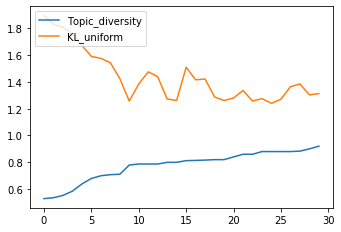

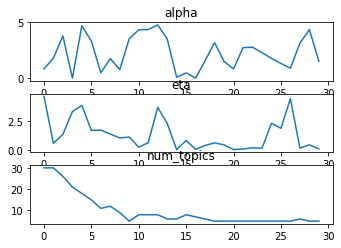

In [9]:
# Plot data
res.plot_all("Topic_diversity")